

### Projeto de manipulação de dados com Pandas.
Será usado um DataFrame em CSV local com dados relacionado a um banco.
Vamos analizar o DataFrame e fazer os tratamentos necessarios identificando por etapas as falhas e as resolvendo.
Vamos lá, bons estudos!!!!!!!

Bibliotecas usadas no projeto.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

Versão das  bibliotecas. 

In [2]:
print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0].

The Numpy version is 1.21.6.

The Pandas version is 1.3.5.

The Matplotlib version is 3.2.2.

The Scikit-Learn version is 1.0.2.



Fazendo o upload do banco de dados, estamos usando o formato de banco de dados local, pode ser feito com o banco de dados na nuvem, só precisa trocar o formato do carregamento.  

In [3]:
from google.colab import files 
uploaded = files.upload()

Saving Banco1.xls to Banco1.xls


Colocando o dataset, em uma variável df.

In [4]:
df =pd.read_excel('Banco1.xls')

Método shape para examinar o número de linhas e colunas.

In [5]:
df.shape

(30000, 25)

Usando o método columns para examinar o nome das colunas.

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Usando o método head() mostra as 5 primeiras linhas.

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Usando o método nunique com a coluna ID para contar os valores exclusivos do banco de dados. 

In [ ]:
df['ID'].nunique()


29687

In [ ]:
df.shape

(30000, 25)




1.   Armazenando as contagens de valores em uma variável definida como id_counts.
2.   Exibindo os valores armazenados usando o método head.



In [ ]:
id_counts = df['ID'].value_counts()
id_counts.head()

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

Pegamos todos os IDs que somaram 2 no código acima e fizemos a contagem através dos métodos value_counts totalizando 313 duplicados e 29.374 não duplicados.

In [ ]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

1.   Usando o método mascara booleana. 
2.   Usamos a variável dupe_mask par armazenar os valore booleanos.

In [ ]:
dupe_mask = id_counts == 2

dupe_mask [0:314]

ad23fe5c-7b09     True
1fb3e3e6-a68d     True
89f8f447-fca8     True
7c9b7473-cc2f     True
90330d02-82d9     True
                 ...  
73ea498f-44b2     True
327d06d5-ce7f     True
d13465a5-a9e0     True
841ae407-dc4c     True
76af421a-18d5    False
Name: ID, Length: 314, dtype: bool

Criando uma dicionário com os IDs duplicados.

In [ ]:
id_counts.index[0:315]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9', '2a793ecf-05c6', '75938fec-e5ec', '7be61027-a493',
       'a3a5c0fc-fdd6', 'b44b81b2-7789',
       ...
       'fc73f07e-eb96', '2a8ad33f-fa9c', 'cdae2be5-8ec4', 'c69162db-4864',
       '73ea498f-44b2', '327d06d5-ce7f', 'd13465a5-a9e0', '841ae407-dc4c',
       '76af421a-18d5', '6b880547-5a2c'],
      dtype='object', length=315)

Criando uma nova variável e colocando dupe_ids contendo dupe_mask.

In [ ]:
dupe_ids = id_counts.index[dupe_mask]

Convertendo dupe_ids em uma lista.

In [ ]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

Nossa variável dupe_ids agora contém a lista de IDs duplicados.

In [ ]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']


1.   Mostrando as linhas duplicatas.
2.   analisando podemos identificar que dos IDs duplicados contém duas linhas e uma delas está com valores todos em zero.


In [ ]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Criando uma matriz bolleana com o mesmo tamanha do DataFrame.

In [ ]:
df_zero_mask = df == 0

Criando uma série booleana.

In [ ]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

Calculando a soma da série bolleana.

In [ ]:
sum(feature_zero_mask)

315

Limpando o DataFrame eliminando as linhas só com zeros, exceto pelo ID.

In [ ]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

Mostrando o número de linhas: após a limpeza do código acima.



In [ ]:
df_clean_1.shape

(29685, 25)

Obtendo o número de IDs exclusivos.

### Terminamos o Tratamento da coluna IDs.



In [ ]:
df_clean_1['ID'].nunique()

29685

Verificando o tipo de dados das colunas do dataset usando o método .info()

In [ ]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in


1.   Começado o tratamento na coluna PAY_1.
2.   isualizando as primeiras 5 linhas da série 'PAY_1', notamos que existem valores 0 que não estão documentados. Os valores documentados.


In [ ]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

Obtendo a contagem de valores da coluna 'PAY_1' usando o metodo .value_counts().

In [ ]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

Usando uma máscara lógica com o operador != para encontrar todas as linhas que não têm dados ausentes para a característica de 'PAY_1'.

In [ ]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

calculando a soma da mascara para verificar quantas linhas não têm dados ausentes.

In [ ]:
sum(valid_pay_1_mask)

26664

Limpando os dados eliminando as linhas linhas de 'PAY_1'com valores ausentes e obtendo a dimensão dos dados.  

In [ ]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask, :].copy()
df_clean_2.shape

(26664, 25)

Convertendo o tipo de dados de 'PAY_1' de object para int64 e exibindo os metadados das colunas  'PAY_1' e 'PAY_2'.

In [ ]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1','PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


Histograma contendo  as características de 'AGE' e 'LIMIT_BAL'.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cbcbf41f0>,
      dtype=object)

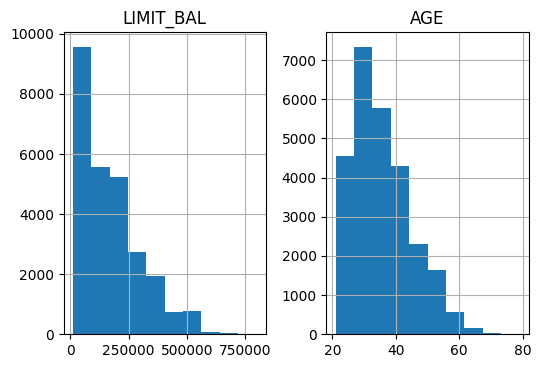

In [ ]:
mpl.rcParams['figure.dpi'] =100
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

Relatório tabular de síntese estatística.

In [ ]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


Obtendo as contagens de valores de características 'EDUCATION'. 

In [ ]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Combinando os graus não documentados da caracristicas 'EDUCATION' com grau 'outros'.

In [ ]:
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

Obtendo as contagens de valores da caracteristica 'MARRIACE'.

In [ ]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Altera os valores 0 da característica 'MARRIAGE' para 3.

In [ ]:
df_clean_2['MARRIAGE'].replace(to_replace=[0], value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()


2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Gráfico de taxa de inadimplência dentro dos graus de instrução, o gráfico mostra qual o grau de inadimplência levando com base o grau de educação.

Text(0.5, 0, 'Education level: ordinal encoding')

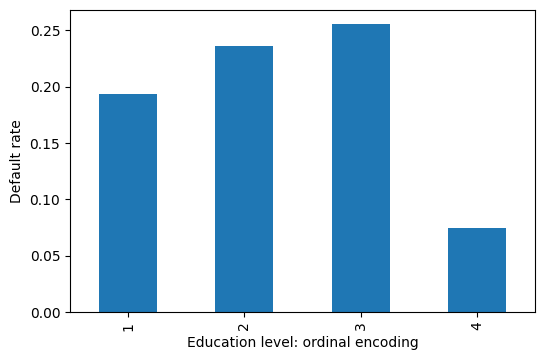

In [ ]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

Criando uma coluna vazia.

In [ ]:
df_clean_2['EDUCATION_CAT']= 'none'


Examina as primeiras linhas do DataFrame referentes as colunas 'EDUCATION' e 'EDUCATION_CAT'.

In [ ]:
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


Cria um dicionário que descreva o mapeamento das categorias de instrução.

In [ ]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

Aplica o mapeamento a coluna 'EDUCATION' original usando .map e atribui o resultado a nova coluna 'EDUCATION_CAT'.

In [ ]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


Cria um DataFrame de condição one-hot da coluna 'EDUCATION_CAT'.

In [ ]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


Concatena o DataFrame de condição one-hot o original.

In [ ]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis =1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university','others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0
